In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml import Pipeline


In [31]:
# Create Spark session
spark = SparkSession.builder \
    .appName("Alzheimer's Disease Analysis") \
    .getOrCreate()

# Load the CSV file into a Spark DataFrame
file_path = "Resources/alzheimers_disease_data.csv"
alzheimers_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Show the schema of the DataFrame
alzheimers_df.printSchema()

# Display the first few rows of the DataFrame
alzheimers_df.show(5)


root
 |-- PatientID: integer (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Gender: integer (nullable = true)
 |-- Ethnicity: integer (nullable = true)
 |-- EducationLevel: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoking: integer (nullable = true)
 |-- AlcoholConsumption: double (nullable = true)
 |-- PhysicalActivity: double (nullable = true)
 |-- DietQuality: double (nullable = true)
 |-- SleepQuality: double (nullable = true)
 |-- FamilyHistoryAlzheimers: integer (nullable = true)
 |-- CardiovascularDisease: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Depression: integer (nullable = true)
 |-- HeadInjury: integer (nullable = true)
 |-- Hypertension: integer (nullable = true)
 |-- SystolicBP: integer (nullable = true)
 |-- DiastolicBP: integer (nullable = true)
 |-- CholesterolTotal: double (nullable = true)
 |-- CholesterolLDL: double (nullable = true)
 |-- CholesterolHDL: double (nullable = true)
 |-- CholesterolTrig

In [32]:
# Separate target variable and features
features = alzheimers_df.columns
features.remove('PatientID')
features.remove('Diagnosis')
features.remove('DoctorInCharge')

# StringIndexer for the target variable
indexer = StringIndexer(inputCol="Diagnosis", outputCol="label")

# VectorAssembler for the feature variables
assembler = VectorAssembler(inputCols=features, outputCol="features")

# Create a pipeline to transform the data
pipeline = Pipeline(stages=[indexer, assembler])

# Fit and transform the data
transformed_data = pipeline.fit(alzheimers_df).transform(alzheimers_df)

# Split the data into training and testing sets
train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=5)


In [33]:
# Separate target variable and features
features = alzheimers_df.columns
features.remove('PatientID')
features.remove('Diagnosis')
features.remove('DoctorInCharge')

# StringIndexer for the target variable
indexer = StringIndexer(inputCol="Diagnosis", outputCol="label")

# VectorAssembler for the feature variables
assembler = VectorAssembler(inputCols=features, outputCol="features")

# Create a pipeline to transform the data
pipeline = Pipeline(stages=[indexer, assembler])

# Fit and transform the data
transformed_data = pipeline.fit(alzheimers_df).transform(alzheimers_df)

# Split the data into training and testing sets
train_data, test_data = transformed_data.randomSplit([0.8, 0.2], seed=5)


In [ ]:
# Build and train the Logistic Regression model
lr_model = LogisticRegression(random_state=5)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
class_report_lr = classification_report(y_test, y_pred_lr)

# Display results
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Confusion Matrix:\n", conf_matrix_lr)
print("Logistic Regression Classification Report:\n", class_report_lr)


In [34]:
# Convert Spark DataFrame to Pandas DataFrame for sklearn
train_data_pd = train_data.toPandas()
test_data_pd = test_data.toPandas()

# Separate features and labels
X_train = train_data_pd[features]
y_train = train_data_pd['label']
X_test = test_data_pd[features]
y_test = test_data_pd['label']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set the number of trees in the forest
rf_model = RandomForestClassifier(n_estimators=500, random_state=5)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Display results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", class_report_rf)


Random Forest Accuracy: 0.9543269230769231
Random Forest Confusion Matrix:
 [[283   5]
 [ 14 114]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       288
         1.0       0.96      0.89      0.92       128

    accuracy                           0.95       416
   macro avg       0.96      0.94      0.95       416
weighted avg       0.95      0.95      0.95       416



In [35]:
# Build and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=5)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

# Display results
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Confusion Matrix:\n", conf_matrix_dt)
print("Decision Tree Classification Report:\n", class_report_dt)


Decision Tree Accuracy: 0.9086538461538461
Decision Tree Confusion Matrix:
 [[269  19]
 [ 19 109]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       288
         1.0       0.85      0.85      0.85       128

    accuracy                           0.91       416
   macro avg       0.89      0.89      0.89       416
weighted avg       0.91      0.91      0.91       416



### ROC (Receiver Operating Characteristic) Curve and AUC (Area Under the Curve)
The Receiver Operating Characteristic (ROC) curve is a graphical plot that illustrates the diagnostic ability of a binary classifier as its discrimination threshold is varied. The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the entire ROC curve.

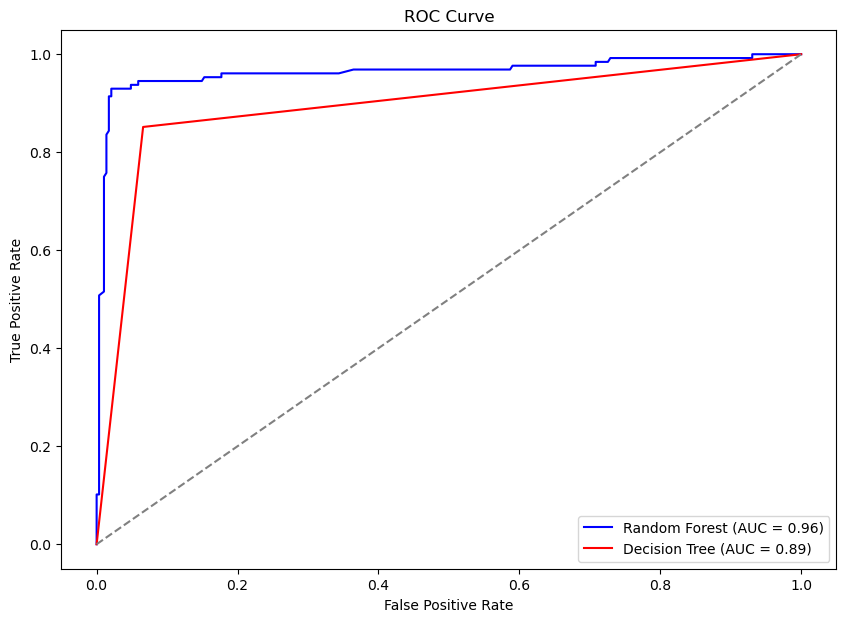

Random Forest AUC: 0.9639892578125
Decision Tree AUC: 0.892795138888889


In [36]:
# Compute ROC curve and AUC for Random Forest
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

# Compute ROC curve and AUC for Decision Tree
y_prob_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

# Plot ROC curves
plt.figure(figsize=(10, 7))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', label=f'Decision Tree (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print("Random Forest AUC:", auc_rf)
print("Decision Tree AUC:", auc_dt)


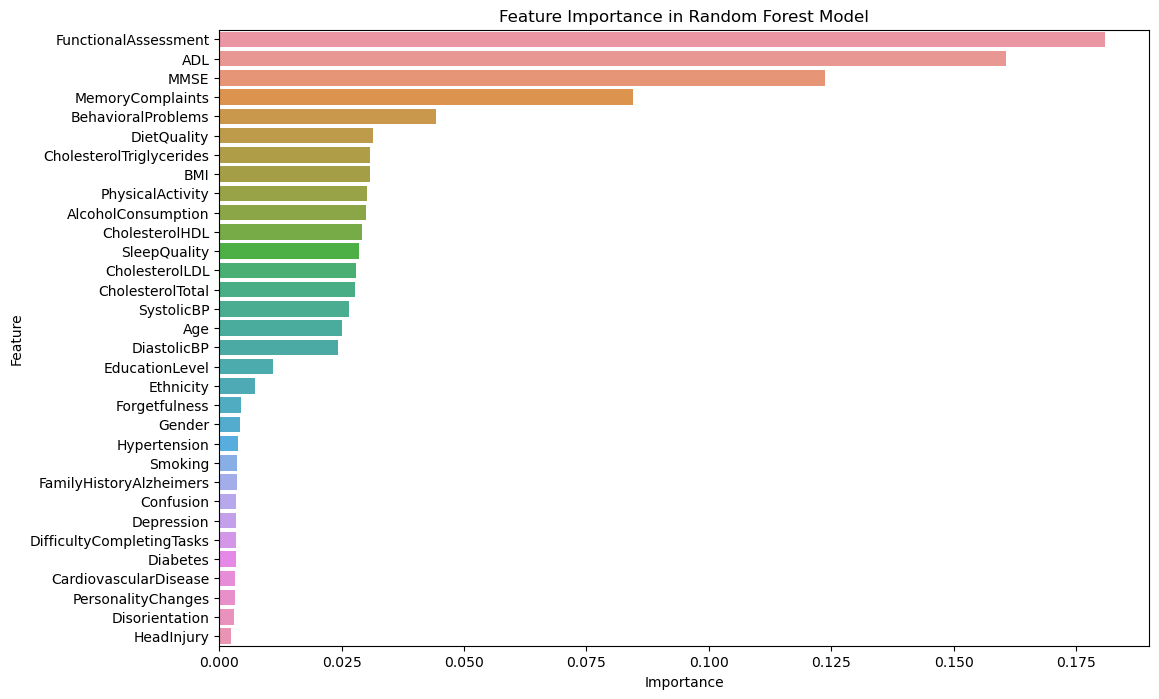

In [37]:
# Feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
features = alzheimers_df.columns
features.remove('PatientID')
features.remove('Diagnosis')
features.remove('DoctorInCharge')

rf_importance_df = pd.DataFrame(list(zip(features, rf_feature_importance)), columns=["Feature", "Importance"])
rf_importance_df = rf_importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance for Random Forest using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()


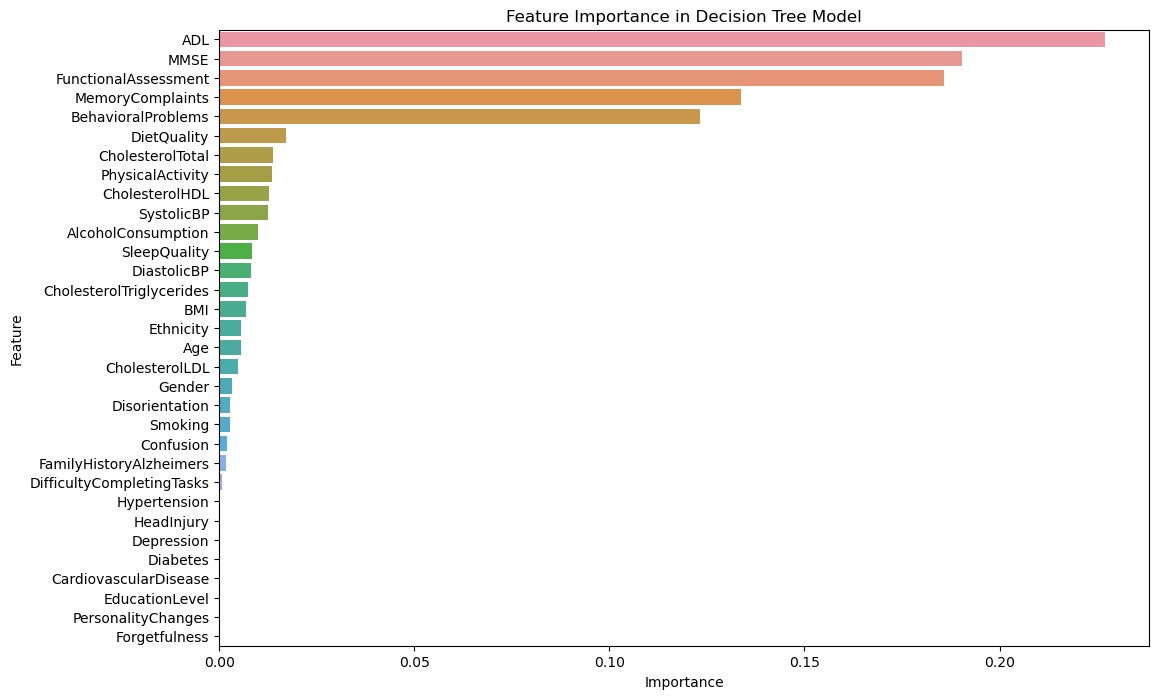

In [38]:
# Feature importance for Decision Tree
dt_feature_importance = dt_model.feature_importances_
dt_importance_df = pd.DataFrame(list(zip(features, dt_feature_importance)), columns=["Feature", "Importance"])
dt_importance_df = dt_importance_df.sort_values(by="Importance", ascending=False)

# Plot the feature importance for Decision Tree using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df)
plt.title('Feature Importance in Decision Tree Model')
plt.show()


In [39]:
# Overall model performance display
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest AUC:", auc_rf)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree AUC:", auc_dt)


Random Forest Accuracy: 0.9543269230769231
Random Forest AUC: 0.9639892578125
Decision Tree Accuracy: 0.9086538461538461
Decision Tree AUC: 0.892795138888889
